In [1]:
import numpy as np
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

### 1.a)

Registros con y1
520
Registros con y2
480


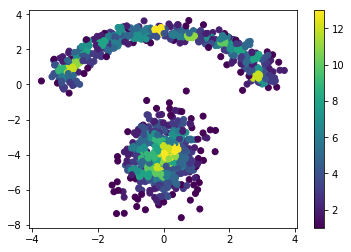

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)


print("Registros con y1")
print( len(y1) )
print("Registros con y2")
print( len(y2) )


equis=X[:,0]
ii=X[:,1]

hist, xedges, yedges = np.histogram2d(equis, ii,30)
xidx = np.clip(np.digitize(equis, xedges) - 1, 0, hist.shape[0] - 1)
yidx = np.clip(np.digitize(ii, yedges) - 1, 0, hist.shape[1] - 1)
c = hist[xidx, yidx]
plt.scatter(equis, ii, c=c)

plt.colorbar()
plt.show()


In [3]:
import matplotlib.pyplot as plt
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

### 1.b)

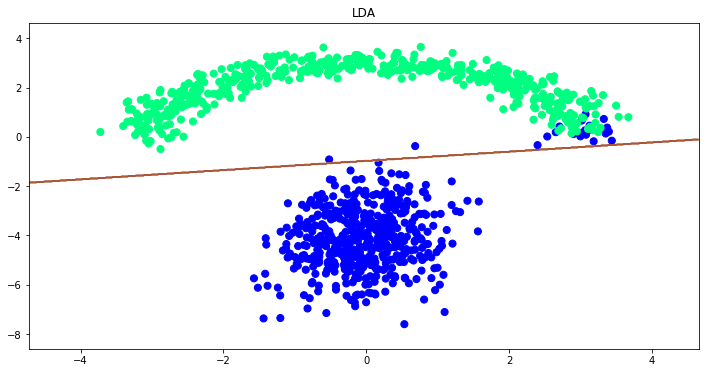

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_LDA = LDA()
model_LDA.fit(X,y)
visualize_border(model_LDA,X,y,"LDA")

### 1.c)

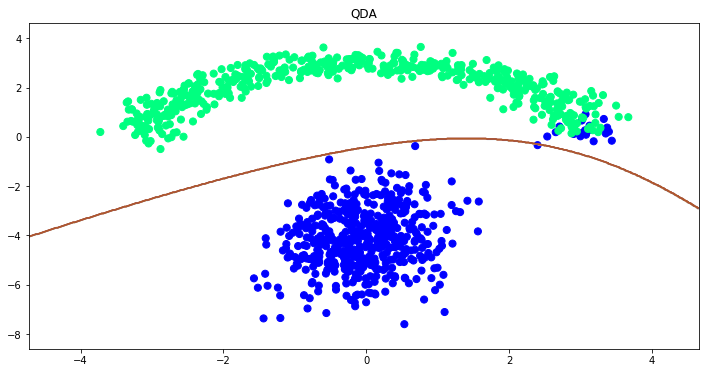

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_QDA = QDA()
model_QDA.fit(X,y)
visualize_border(model_QDA,X,y,"QDA")

### 1.d)

In [6]:
from sklearn.metrics import accuracy_score
y_true = y
y_pred_LDA = model_LDA.predict(X)
y_pred_QDA = model_QDA.predict(X)
print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred_LDA)))
print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred_QDA)))

Miss Classification Loss: 0.022000
Miss Classification Loss: 0.019000


In [7]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

### 1.e)

In [8]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

Parametro c en model.set_param

C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

### 1.f)

In [9]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

### 1.g)

In [10]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf') #try poly
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

In [11]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly') #try poly
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

### 1.h)

In [12]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model
p_min = 1 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

### 1.i)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model
p_min = 1 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

## 2

In [14]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

### 2.a)

In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')

print ("Informacion:")
df.info()
print ("\nNumero de clases:")
print (df['label'].value_counts())
df.head()

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
dataset     176 non-null object
fname       176 non-null object
label       124 non-null object
sublabel    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB

Numero de clases:
artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


<p>Se logra apreciar que hay un total de 176 registros para ser analizados. Estos registros poseen la estructura <b>dataset</b> que corresponde a la letra asignada para el dataset (siendo el dataset "A" según lo solicitado), <b>fname</b> que corresponde al nombre de cada archivo de sonido a analizar, <b>label</b> que corresponde a la condición de salud que refleja el audio y <b>sublabel</b> que corresponde a información adicionada que podría existir en el archivo de audio (y que sólo se presenta en el dataset B). Hay 40 registros de la clase <i>artifact</i>, 34 de la clase <i>murmur</i>, 19 de la clase <i>extrahls</i> y hay 31 registros normales. Además, hay 52 registros que no poseen clasificación. 

### 2.b)

In [16]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux

new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='heartbeat-sounds/set_a/') #MODIFICAR EL PATH A LA CARPETA CON LOS AUDIOS
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

new_df.head()

,file_name,time_series,len_series
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900


<p>Este paso es importante dado que se debe traducir la información de los archivos de sonido en algún formato con el que se pueda trabajar y así obtener la información necesaria para posteriormente entrenar los módelos. Para esto, tendrán que ser representados en una matriz donde se podrán aplicar las operaciones correspondientes. Es por lo anterior que se debe rellenar con ceros a aquellos archivos que poseen una duración menor e igualar el tamaño de los datos para que no existan elementos vacíos dentro de la matriz.</p>

### 2.c)

In [17]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
            1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
            2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
            0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
new_df['target'].value_counts()

normal/extrahls    66
artifact           58
murmur             52
Name: target, dtype: int64

<p>En estos momentos hay 58 registros de la clase <i>artifact</i>, 52 de la clase <i>murmur</i> y 66 de la clase <i>normal/extrahls</i> (que ahora se encuentran juntas), por lo que ahora todos los registros tienen una clasifación. Al tener etiquetas mal asignadas se altera el entrenamiento del modelo, el cual podría dar predicciones erradas dado que hay distintas concentraciones de datos para ciertas etiquetas en lugar de las esperadas. Un solo dato podría afectar dependiendo del modelo que se decida entrenar, ya que existen algunos que modificarán su curva existiendo un sólo dato alterado. Por otro lado, si la etiqueta que se coloque mal no pertenece al conjunto de posibles clasificaciones, se estaría dando un gran golpe al modelo ya que este podría situar sus margenes erroneamente, separando mal los datos. Esto provocaría incluso que el modelo no pueda predecir.</p>

### 2.d)

In [18]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

new_df['target'].value_counts()

2    66
0    58
1    52
Name: target, dtype: int64

<p>Se aprecia que hay 58 registros de la etiqueta <b>0</b>, 52 de la etiqueta <b>1</b> y 66 de la etiqueta <b>2</b></p>

### 2.e)

In [19]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape
#y.shape

(176, 396900)

<p>Las dimensiones de la matriz indica que podría existir un problema por la maldición de la dimensionalidad, ya que se está trabajando con número de <b>396900</b> atributos. Es por lo anterior que la máquina podría reducir su performance en gran medida.</p>

### 2.f)

In [20]:
X_fourier = np.abs(np.fft.fft(X))
X_fourier.shape

(176, 396900)

<p>Ahora los datos plasman las frecuencias como atributos en lugar de tiempos. No hay cambios en las dimensiones de la matriz.</p> 

### 2.g)

In [21]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

<p>Este paso reduce cerca de 4 veces la dimensionalidad de la matriz. Además, elimina el exceso de información ya que solo deja la informacíon asociado al período con el que late el corazón (dado por la transformada de fourier aplicada anteriormente, y que al ser una función periódica, sólo basta con conocer la información que se repite constantemente) y se ajusta para calzar con el tamaño dado. Esto se podría comprobar haciendo una expansión de la información mediante una reiteración del período hasta alcanzar el largo antiguo de la matriz, para posteriormente calcular el error asociado entre ambas. Con esta información se podría determinar si la información fue bien representada dependiendo del grado del error.</p>

### 2.h)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y,test_size=0.25, random_state=42)

print ("X de entrenamiento:" ,X_train.shape)
print ("y de entrenamiento: ", y_train.shape)
print ("X de pruebas: ",X_test.shape)
print ("y de pruebas: ",y_test.shape)


X de entrenamiento: (132, 100000)
y de entrenamiento:  (132,)
X de pruebas:  (44, 100000)
y de pruebas:  (44,)


<p>Finalmente se tienen 100000 clases y los conjuntos de entrenamiento y pruebas tienen un largo de 132 y 44 elementos respectivamente.</p>

### 2.i)

In [23]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

<p>Como se explicó anteriormente, es conveniente normalizar los datos por razones como conseguir una mejor distribución y una mayor significancia.</p>

### 2.j)

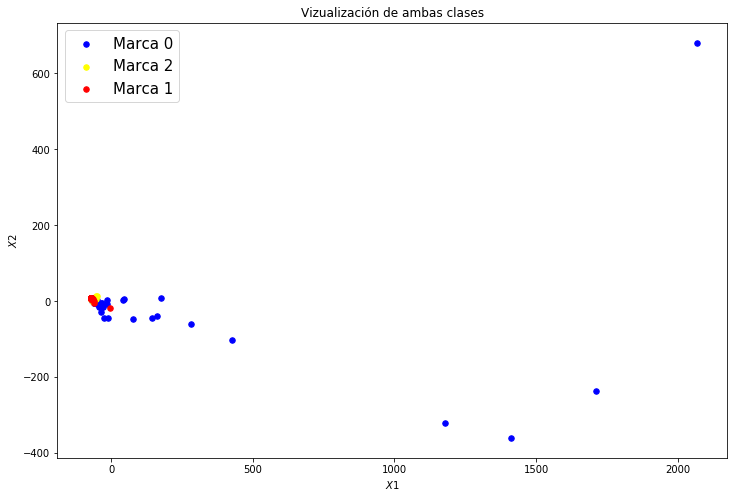

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

#=======================================#
plt.figure(figsize = (12, 8))
plt.scatter([X_pca_train[i,0] for i in range(len(y_train)) if y_train[i] == 0],[X_pca_train[i,1] for i in range(len(y_train)) if y_train[i] == 0], s=30, c = "blue")
plt.scatter([X_pca_train[i,0] for i in range(len(y_train)) if y_train[i] == 2],[X_pca_train[i,1] for i in range(len(y_train)) if y_train[i] == 2], s=30, c = "yellow")
plt.scatter([X_pca_train[i,0] for i in range(len(y_train)) if y_train[i] == 1],[X_pca_train[i,1] for i in range(len(y_train)) if y_train[i] == 1], s=30, c = "red")
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.legend(['Marca 0', 'Marca 2', 'Marca 1'],prop={'size': 15})
plt.title("Vizualización de ambas clases")
plt.show()


<p>Se logra apreciar que los datos se encuentran muy agrupados cerca del origen, y que solo unos datos de la marca 0 se escapan de esta concentración. Para analizar mejor esto, se relizará un zoom al área que concentra los datos de las 3 marcas.</p>

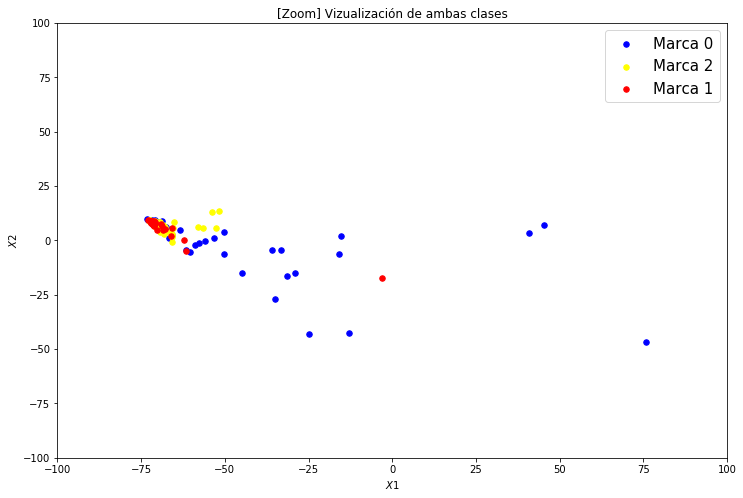

In [25]:
plt.figure(figsize = (12, 8))
plt.scatter([X_pca_train[i,0] for i in range(len(y_train)) if y_train[i] == 0],[X_pca_train[i,1] for i in range(len(y_train)) if y_train[i] == 0], s=30, c = "blue")
plt.scatter([X_pca_train[i,0] for i in range(len(y_train)) if y_train[i] == 2],[X_pca_train[i,1] for i in range(len(y_train)) if y_train[i] == 2], s=30, c = "yellow")
plt.scatter([X_pca_train[i,0] for i in range(len(y_train)) if y_train[i] == 1],[X_pca_train[i,1] for i in range(len(y_train)) if y_train[i] == 1], s=30, c = "red")
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.legend(['Marca 0', 'Marca 2', 'Marca 1'],prop={'size': 15})
plt.title("[Zoom] Vizualización de ambas clases")
plt.axis([-100,100,-100,100])
plt.show()

<p>Ahora se logra apreciar en mejor medida las distintas concentraciones que delimitan el area de cada una. Hay que dejar en claro que esto solo se hizo para describir mejor los datos concentrados, pero que no se están eliminando aquellos datos que se escapan de esta gráfica.</p>

## 2.k)

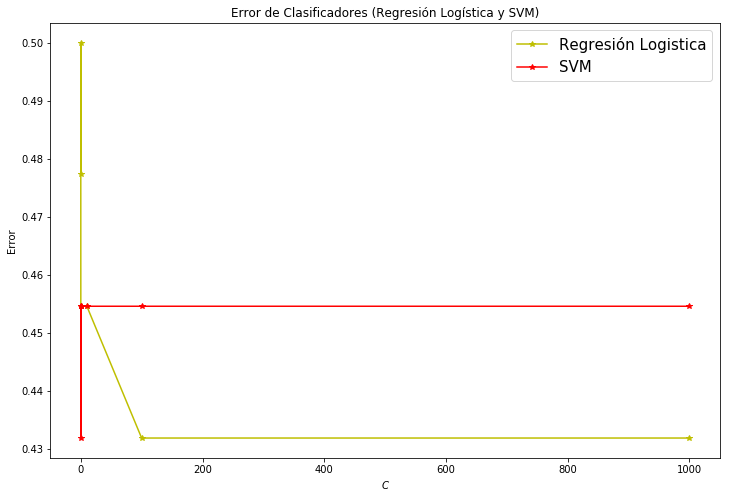

In [26]:
Cs = [0.0001,0.01,0.1,1,10,100,1000]
error_logistica=[]
error_svm=[]

for i in Cs:
    logistica = LR()
    logistica.set_params(C=1/i,penalty='l2') 
    logistica.fit(X_pca_train,y_train)

    y_pred = logistica.predict(X_pca_test)
    score1 = 1-accuracy_score(y_test, y_pred)
    error_logistica.append(score1)
    
for i in Cs:
    svm= SVM()
    svm.set_params(C=i,kernel='linear')
    svm.fit(X_pca_train,y_train)

    y_pred = svm.predict(X_pca_test)
    score2 = 1-accuracy_score(y_test, y_pred)
    error_svm.append(score2)

plt.figure(figsize = (12, 8))
plt.plot(Cs,error_logistica, "*y-")
plt.plot(Cs,error_svm, "*r-")

plt.legend(["Regresión Logistica", "SVM"], prop={'size': 15})

plt.title('Error de Clasificadores (Regresión Logística y SVM)')
plt.xlabel("$C$")
plt.ylabel("Error")

plt.show()

<p>Se logra observar que el error asociado a Regresión Logística llega a ser menor que el de SVM desde que el parámetro se comienza a acercar a 100. Para tener un mejor análisis, se hará una mejor vista de lo que sucede cerca de 0. </p>

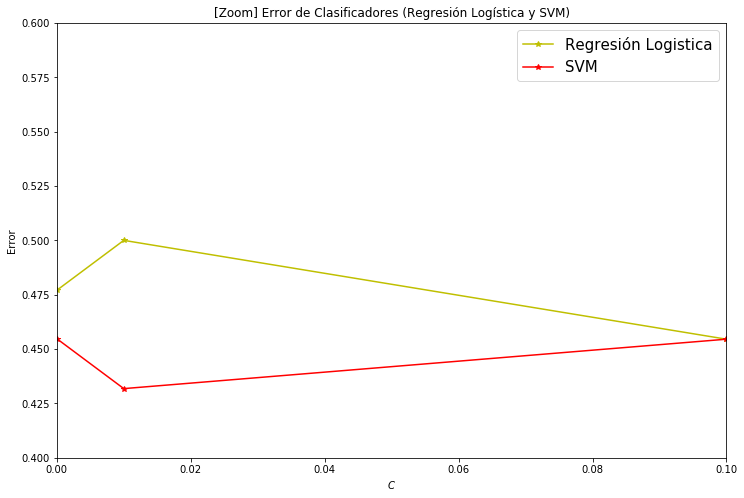

In [27]:
plt.figure(figsize = (12, 8))
plt.plot(Cs,error_logistica, "*y-")
plt.plot(Cs,error_svm, "*r-")

plt.legend(["Regresión Logistica", "SVM"], prop={'size': 15})

plt.title('[Zoom] Error de Clasificadores (Regresión Logística y SVM)')
plt.xlabel("$C$")
plt.ylabel("Error")
plt.axis([0,0.1,0.4,0.60])

plt.show()

<p>Luego de observar esta versión del gráfico, es posible establecer que Regresión Logística disminuye su error a medida que se aumenta el parámetro $c$, consiguiendo su mínimo a medida que se acerca al 100 en adelante. En cambio, SVM consigue su mínimo en el valor de 0.01, desde donde comienza a aumentar gradualmente para mantenerse constante desde el 0.1. Por lo tanto, ambos módelos se comportan de manera contraria para el mismo parámetro. </p>

## 2.l)

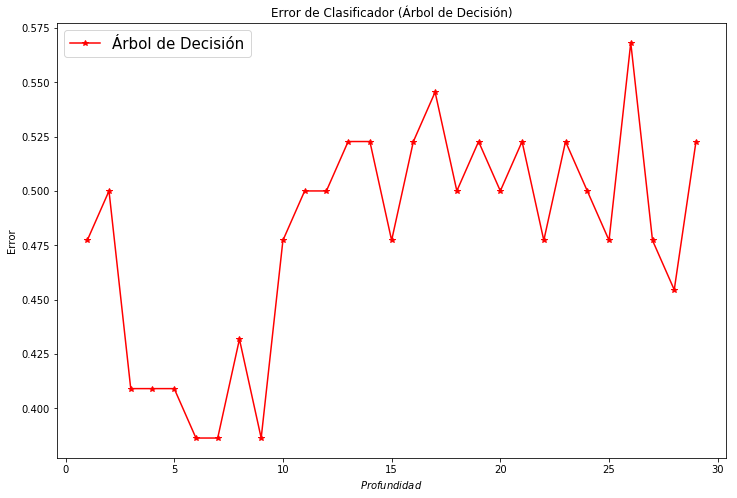

In [28]:
Depths = range(1,30)
error_tree=[]

for param in Depths:
    tree = Tree() #edit the train_model function
    tree.set_params(max_depth=param,criterion='gini',splitter='best')
    tree.fit(X_pca_train,y_train)
    
    y_pred = tree.predict(X_pca_test)
    score = 1-accuracy_score(y_test, y_pred)
    error_tree.append(score)

plt.figure(figsize = (12, 8))
plt.plot(Depths,error_tree, "*r-")

plt.legend(["Árbol de Decisión"], prop={'size': 15})

plt.title('Error de Clasificador (Árbol de Decisión)')
plt.xlabel("$Profundidad$")
plt.ylabel("Error")

plt.show()


<p>Se logra apreciar que el error de este modelo oscila en gran medida mientras se aumenta la profundidad del árbol. Sin embargo, hay un rango de valores en el cual este deja de oscilar pudiendo llegar al valor mínimo en la profundidad de <b>7</b>. El mínimo error de este modelo llega a ser menor que los mínimos errores de Regresión Logística y de SVM.</p>

## 2.m)

<p>Para la creación de la tabla se decidió usar los parámetros que minimizaron el error en cada modelo. Con lo anterior se decidió crear una tabla desde 2 a 10 dimensiones de atributos.</p>

In [29]:
dimensiones=range(2,11)
dic={'RL':[],'SVM':[],'TREE':[]}
for d in dimensiones:
    pca_model = PCA(n_components=d)
    pca_model.fit(X_train)
    X_pca_train = pca_model.transform(X_train)
    X_pca_test = pca_model.transform(X_test)
    
    logistica = LR()
    logistica.set_params(C=1/100,penalty='l2') 
    logistica.fit(X_pca_train,y_train)

    y_pred = logistica.predict(X_pca_test)
    score = 1-accuracy_score(y_test, y_pred)
    dic['RL'].append(score)
    
    svm= SVM()
    svm.set_params(C=0.01,kernel='linear')
    svm.fit(X_pca_train,y_train)

    y_pred = svm.predict(X_pca_test)
    score = 1-accuracy_score(y_test, y_pred)
    dic['SVM'].append(score)
    
    tree = Tree() #edit the train_model function
    tree.set_params(max_depth=7,criterion='gini',splitter='best')
    tree.fit(X_pca_train,y_train)
    
    y_pred = tree.predict(X_pca_test)
    score = 1-accuracy_score(y_test, y_pred)
    dic['TREE'].append(score)

df = pd.DataFrame(data=dic,index=np.arange(2,11))
df #Mostrar el dataframe

,RL,SVM,TREE
2,0.431818,0.431818,0.409091
3,0.431818,0.409091,0.409091
4,0.431818,0.409091,0.409091
5,0.409091,0.363636,0.272727
6,0.363636,0.272727,0.363636
7,0.454545,0.272727,0.318182
8,0.340909,0.272727,0.227273
9,0.340909,0.272727,0.295455
10,0.318182,0.295455,0.250000


<p>Analizando la tabla, se aprecia que el error logra disminuir para ciertas variaciones del número de dimensiones. Además, el mínimo error para todos los modelos se consigue (para la muestra seleccionada) en el valor de 8 dimensiones. Sin embargo, para Regresión Lineal, se logra a las 10 dimensiones.</p>
<p>Lo anterior se debe a que el tener más dimensiones, existen más posibilidades para definir fronteras que separan la agrupación de datos a analizar. Sin embargo, llega un punto en que la complejidad se vuelve excesiva, por lo que ataca nuevamente la <i>maldición de la dimensionalidad</i>.</p>

## 2.n)

C:\Users\Gabriel\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


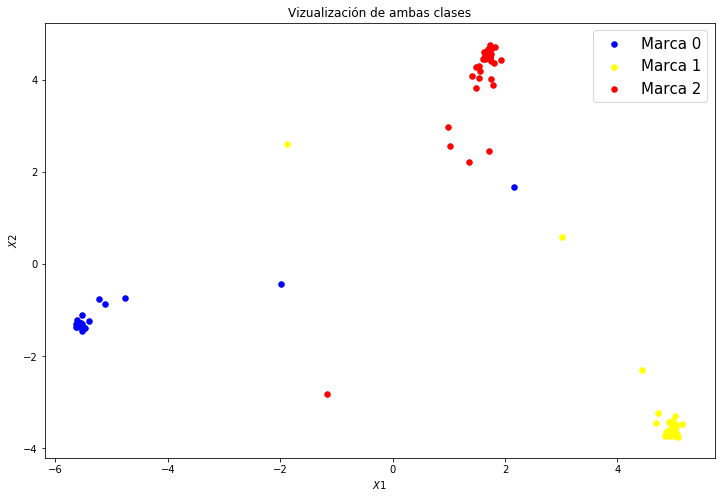

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_lda_train = model_lda.transform(X_train)
X_lda_test = model_lda.transform(X_test)

#=======================================#
plt.figure(figsize = (12, 8))
plt.scatter([X_lda_train[i,0] for i in range(len(y_train)) if y_train[i] == 0],[X_lda_train[i,1] for i in range(len(y_train)) if y_train[i] == 0], s=30, c = "blue")
plt.scatter([X_lda_train[i,0] for i in range(len(y_train)) if y_train[i] == 1],[X_lda_train[i,1] for i in range(len(y_train)) if y_train[i] == 1], s=30, c = "yellow")
plt.scatter([X_lda_train[i,0] for i in range(len(y_train)) if y_train[i] == 2],[X_lda_train[i,1] for i in range(len(y_train)) if y_train[i] == 2], s=30, c = "red")
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.legend(['Marca 0', 'Marca 1', 'Marca 2'],prop={'size': 15})
plt.title("Vizualización de ambas clases")
plt.show()

<p>En el gráfico se logra apreciar que las concentraciones de datos se encuentras más separadas según las etiquetas, lo que debería mejorar la calidad de las fronteras del modelo utilizado para predecir.</p>
<p>El warning que surge está dado porque existen datos colineales, lo que significa que está mal condicionada. El método LDA necesita que la matriz esté bien condicionada ya que para los cálculos ejecuta inversiones de esta.</p>

## 2.o)

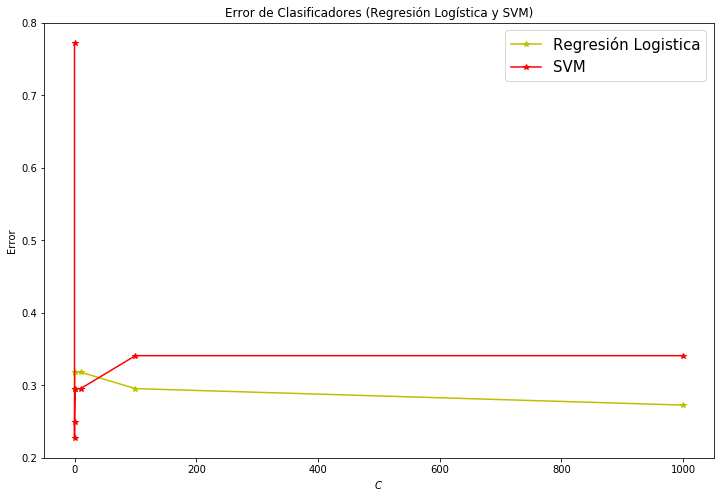

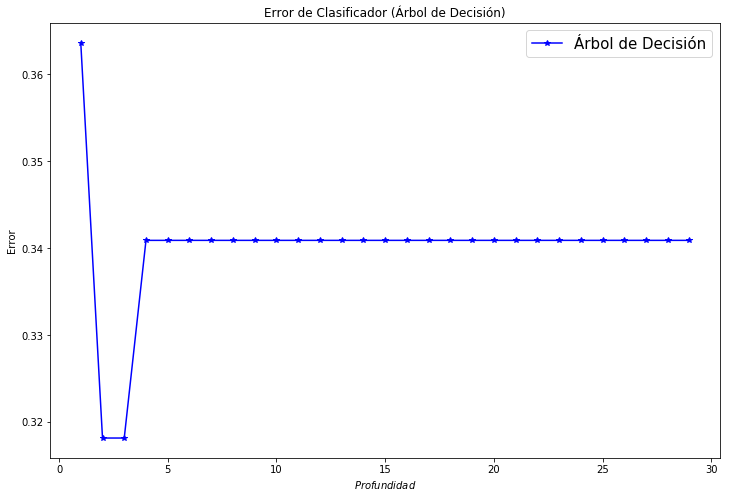

In [31]:
Cs = [0.0001,0.01,0.1,1,10,100,1000]
Depths = range(1,30)
error_logistica=[]
error_svm=[]
error_tree=[]

for i in Cs:
    logistica = LR()
    logistica.set_params(C=1/i,penalty='l2') 
    logistica.fit(X_lda_train,y_train)

    y_pred = logistica.predict(X_lda_test)
    score1 = 1-accuracy_score(y_test, y_pred)
    error_logistica.append(score1)

    svm= SVM()
    svm.set_params(C=i,kernel='linear')
    svm.fit(X_lda_train,y_train)

    y_pred = svm.predict(X_lda_test)
    score2 = 1-accuracy_score(y_test, y_pred)
    error_svm.append(score2)

for param in Depths:
    tree = Tree() #edit the train_model function
    tree.set_params(max_depth=param,criterion='gini',splitter='best')
    tree.fit(X_lda_train,y_train)
    
    y_pred = tree.predict(X_lda_test)
    score = 1-accuracy_score(y_test, y_pred)
    error_tree.append(score)

    
plt.figure(1, figsize = (12, 8))
plt.plot(Cs,error_logistica, "*y-")
plt.plot(Cs,error_svm, "*r-")
plt.title('Error de Clasificadores (Regresión Logística y SVM)')
plt.xlabel("$C$")
plt.ylabel("Error")
plt.legend(["Regresión Logistica", "SVM"], prop={'size': 15})


plt.figure(2, figsize = (12, 8))
plt.plot(Depths,error_tree, "*b-")
plt.legend(["Árbol de Decisión"], prop={'size': 15})

plt.title('Error de Clasificador (Árbol de Decisión)')
plt.xlabel("$Profundidad$")
plt.ylabel("Error")

plt.show()

<p>Al comparar todas las representaciones con las que se habían creado previamente, se tiene que todas disminuyeron el error asociado respecto a los obtenidos por PCA. Lo anterior concuerda con lo que se explicó previamente sobre que las concentraciones de datos se encuentras más definidas y separadas, por lo que resulta más fácil definir las fronteras.</p>

## 2.p)

# AUXILIO

## 3

### 3.a)

           tweet_id
count  4.000000e+04
mean   1.845184e+09
std    1.188579e+08
min    1.693956e+09
25%    1.751431e+09
50%    1.855443e+09
75%    1.962781e+09
max    1.966441e+09
(40000, 4)
     tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...  


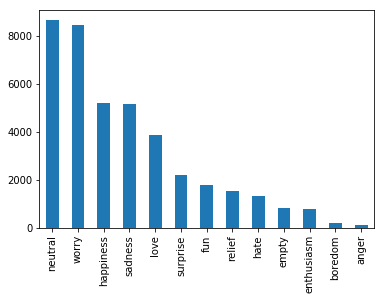

MissxMarisa       23
ChineseLearn      22
erkagarcia        19
MiDesfileNegro    19
lost_dog          18
Name: author, dtype: int64

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('text_emotion.csv')
print(df.describe())
print(df.shape)
print(df.head())

df['sentiment'].value_counts().plot(kind='bar')
plt.show()

df['author'].value_counts().head()

### 3.b)

In [33]:
import numpy as np


msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

print(df_train.shape)


print(df_test.shape)


(31947, 4)
(8053, 4)


### 3.c)

In [34]:
import string
import nltk

pd.options.mode.chained_assignment = None

nltk.download('wordnet')
#nltk.download('stopwords')

def normalizar( df ):

    #definir lemmatizer
    lemmatizer = WordNetLemmatizer()

    ##hay varios algoritmos de stemmer. 
    # http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
    #from nltk.stem.porter import PorterStemmer
    #stemmer = PorterStemmer()

    #descargar y definir stop words
    
    #stop = stopwords.words('english')

    #minusculas
    df['content'] = df['content'].str.lower()     

    #remover puntuacion
    df['content'] = df['content'].str.replace('[^\w\s]',' ')   

    #remove stopwords
    df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))  

    #stemming or lematize
    df['content'] = df['content'].apply(lambda x : filter(None,x.split(" ")))
    df['content'] = df['content'].apply(lambda x : [lemmatizer.lemmatize(y) for y in x]) #lematize
    #df['content'] = df['content'].apply(lambda x : [stemmer.stem(y) for y in x]) #stem
    df['content'] = df['content'].apply(lambda x : " ".join(x))
    return

normalizar(df_train)
df_train.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'WordNetLemmatizer' is not defined